In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
cd /content/drive/MyDrive/PPW/tugas

/content/drive/MyDrive/PPW/tugas


In [44]:
!pip install Sastrawi

In [36]:
!pip install networkx matplotlib

In [45]:
import pandas as pd
import numpy as np

import re

import nltk
from nltk.corpus import stopwords

#stemming
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import nltk

from nltk.tokenize import sent_tokenize

import networkx as nx
import matplotlib.pyplot as plt

In [53]:
# # Path ke file di Google Drive (ubah sesuai lokasimu)
# # file_path = '/content/drive/MyDrive/PPW/tugas/satu-berita.csv'

# file_path = '/content/drive/MyDrive/PPW/tugas/Tugas-Crawling-Data-Berita-2-kategori.csv'


# # Baca file CSV
# df = pd.read_csv(file_path)

# # Tambahkan tag <eos> sebagai pelabelan akhir kalimat
# def add_eos_tag(text):
#     return re.sub(r'\.\s+', ' <eos> ', text)  # Ganti titik (.) dengan <eos>

# df[['Judul Berita', 'Isi Berita', 'Tanggal Berita', 'Kategori Berita']].iloc[1]

# # Terapkan pelabelan akhir kalimat
# df_eos = df['Isi Berita EOS'] = df['Isi Berita'].apply(add_eos_tag)

# Path ke file di Google Drive (ubah sesuai lokasimu)
file_path = '/content/drive/MyDrive/PPW/tugas/Tugas-Crawling-Data-Berita-2-kategori.csv'

# Baca file CSV
df = pd.read_csv(file_path)

# Tambahkan tag <eos> sebagai pelabelan akhir kalimat
def add_eos_tag(text):
    return re.sub(r'\.\s+', ' <eos> ', text)  # Ganti titik (.) dengan <eos>

# Terapkan pelabelan akhir kalimat
df['Isi Berita EOS'] = df['Isi Berita'].apply(add_eos_tag)

In [56]:
# Tampilkan hasil setelah pelabelan EOS
df[['Isi Berita', 'Isi Berita EOS']]

,Isi Berita,Isi Berita EOS
0,"TIMESINDONESIA, JAKARTA – Di bawah kepemimpina...","TIMESINDONESIA, JAKARTA – Di bawah kepemimpina..."
1,"TIMESINDONESIA, MALANG – Bakal cawabup Malang,...","TIMESINDONESIA, MALANG – Bakal cawabup Malang,..."
2,"TIMESINDONESIA, BANTUL – Rois Syuriah PCNU Ban...","TIMESINDONESIA, BANTUL – Rois Syuriah PCNU Ban..."
3,"TIMESINDONESIA, MOJOKERTO – Ribuan kader PKB K...","TIMESINDONESIA, MOJOKERTO – Ribuan kader PKB K..."
4,"TIMESINDONESIA, JAKARTA – Partai Kebangkitan B...","TIMESINDONESIA, JAKARTA – Partai Kebangkitan B..."
...,...,...
95,"TIMESINDONESIA, MALANG – Azquira Scarf menggel...","TIMESINDONESIA, MALANG – Azquira Scarf menggel..."
96,"TIMESINDONESIA, MALANG – Pada Minggu (1/9/2024...","TIMESINDONESIA, MALANG – Pada Minggu (1/9/2024..."
97,"TIMESINDONESIA, SURABAYA – Memilih wewangian p...","TIMESINDONESIA, SURABAYA – Memilih wewangian p..."
98,"TIMESINDONESIA, MAGELANG – Anda ingin mencicip...","TIMESINDONESIA, MAGELANG – Anda ingin mencicip..."


In [84]:
# Path ke file di Google Drive (ubah sesuai lokasimu)
file_path = '/content/drive/MyDrive/PPW/tugas/Tugas-Crawling-Data-Berita-2-kategori.csv'

# Baca file CSV
df = pd.read_csv(file_path)

# Tambahkan tag <eos> sebagai pelabelan akhir kalimat
def add_eos_tag(text):
    return re.sub(r'\.\s+', ' <eos> ', text)  # Ganti titik (.) dengan <eos>

# Terapkan pelabelan akhir kalimat
df['Isi Berita EOS'] = df['Isi Berita'].apply(add_eos_tag)

# Tampilkan satu berita dari DataFrame (misalnya berita pertama)
berita_index = 90  # Ganti dengan indeks berita
berita_display = df[['Judul Berita', 'Isi Berita', 'Tanggal Berita', 'Kategori Berita', 'Isi Berita EOS']].iloc[[berita_index]]

# Tampilkan DataFrame
display(berita_display)

,Judul Berita,Isi Berita,Tanggal Berita,Kategori Berita,Isi Berita EOS
90,Berkeliling Nusantara Melalui Suguhan Kuliner ...,"TIMESINDONESIA, MAGELANG – Anda ingin mencicip...",04/09/2024 - 17:00,Gaya Hidup,"TIMESINDONESIA, MAGELANG – Anda ingin mencicip..."


In [85]:
def remove_url(data_berita):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', data_berita)

def remove_html(data_berita):
    html = re.compile(r'<(?!eos).*?>')  # Pertahankan <eos>
    return html.sub(r'', data_berita)

def remove_emoji(data_berita):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"
        u"\U0001F300-\U0001F5FF"
        u"\U0001F680-\U0001F6FF"
        u"\U0001F1E0-\U0001F1FF"
        "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', data_berita)

def remove_numbers(data_berita):
    return re.sub(r'\d+', '', data_berita)

def remove_symbols_except_eos(data_berita):
    # Pertahankan <eos> tapi hapus simbol lainnya
    return re.sub(r'[^a-zA-Z0-9\s<eos>]', '', data_berita)

# Terapkan cleansing sambil mempertahankan tag <eos>
df['Isi Berita Clean'] = df['Isi Berita EOS'].apply(remove_url)
df['Isi Berita Clean'] = df['Isi Berita Clean'].apply(remove_html)
df['Isi Berita Clean'] = df['Isi Berita Clean'].apply(remove_emoji)
df['Isi Berita Clean'] = df['Isi Berita Clean'].apply(remove_symbols_except_eos)
df['Isi Berita Clean'] = df['Isi Berita Clean'].apply(remove_numbers)


berita_clean = df[['Isi Berita EOS', 'Isi Berita Clean']].iloc[[berita_index]]

# Tampilkan DataFrame
display(berita_clean)

,Isi Berita EOS,Isi Berita Clean
90,"TIMESINDONESIA, MAGELANG – Anda ingin mencicip...",TIMESINDONESIA MAGELANG Anda ingin mencicipi ...


In [86]:
def case_folding(text):
    return text.lower()

df['case folding'] = df['Isi Berita Clean'].apply(case_folding)

# Tampilkan hasil setelah case folding
# df[['Isi Berita Clean', 'case folding']]

berita_CF = df[['Isi Berita EOS', 'Isi Berita Clean', 'case folding']].iloc[[berita_index]]

# Tampilkan DataFrame
display(berita_CF)

,Isi Berita EOS,Isi Berita Clean,case folding
90,"TIMESINDONESIA, MAGELANG – Anda ingin mencicip...",TIMESINDONESIA MAGELANG Anda ingin mencicipi ...,timesindonesia magelang anda ingin mencicipi ...


In [87]:
def tokenize(text):
    tokens = text.split()
    return tokens

df['tokenize'] = df['case folding'].apply(tokenize)

# Tampilkan hasil setelah tokenisasi
# df[['case folding', 'tokenize']]

berita_tkn = df[['Isi Berita EOS', 'Isi Berita Clean', 'case folding', 'tokenize']].iloc[[berita_index]]

# Tampilkan DataFrame
display(berita_tkn)

,Isi Berita EOS,Isi Berita Clean,case folding,tokenize
90,"TIMESINDONESIA, MAGELANG – Anda ingin mencicip...",TIMESINDONESIA MAGELANG Anda ingin mencicipi ...,timesindonesia magelang anda ingin mencicipi ...,"[timesindonesia, magelang, anda, ingin, mencic..."


In [88]:
nltk.download('stopwords')
stop_words = stopwords.words('indonesian')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [89]:
def remove_stopwords(text):
    return [word for word in text if word not in stop_words]

df['stopword removal'] = df['tokenize'].apply(remove_stopwords)

# Tampilkan hasil setelah stopword removal
# df[['tokenize', 'stopword removal']]

berita_SR = df[['Isi Berita EOS', 'Isi Berita Clean', 'case folding', 'tokenize', 'stopword removal']].iloc[[berita_index]]

# Tampilkan DataFrame
display(berita_SR)

,Isi Berita EOS,Isi Berita Clean,case folding,tokenize,stopword removal
90,"TIMESINDONESIA, MAGELANG – Anda ingin mencicip...",TIMESINDONESIA MAGELANG Anda ingin mencicipi ...,timesindonesia magelang anda ingin mencicipi ...,"[timesindonesia, magelang, anda, ingin, mencic...","[timesindonesia, magelang, mencicipi, kenikmat..."


In [90]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [93]:
def stemming(text):
    return [stemmer.stem(word) for word in text]

df['stemming'] = df['stopword removal'].apply(stemming)

# Tampilkan hasil setelah stemming
# df[['stopword removal', 'stemming']]

berita_stem = df[['Isi Berita EOS', 'Isi Berita Clean', 'case folding', 'tokenize', 'stopword removal', 'stemming']].iloc[[berita_index]]

# Tampilkan DataFrame
display(berita_stem)

,Isi Berita EOS,Isi Berita Clean,case folding,tokenize,stopword removal,stemming
90,"TIMESINDONESIA, MAGELANG – Anda ingin mencicip...",TIMESINDONESIA MAGELANG Anda ingin mencicipi ...,timesindonesia magelang anda ingin mencicipi ...,"[timesindonesia, magelang, anda, ingin, mencic...","[timesindonesia, magelang, mencicipi, kenikmat...","[timesindonesia, magelang, cicip, nikmat, dere..."


In [94]:
def split_sentences(text):
    return text.split(' eos ')

df['kalimat_terpecah'] = df['stemming'].apply(lambda x: ' '.join(x)).apply(split_sentences)

# Atau dalam bentuk tabel (jika menggunakan pandas)
df_kalimat = pd.DataFrame({
    'no': list(range(1, len(df['kalimat_terpecah'][0]) + 1)),
    'kalimat': df['kalimat_terpecah'][0]
})

df_kalimat

,no,kalimat
0,1,timesindonesia jakarta pimpin presiden ri prab...
1,2,fokus mandiri pangan energi kuat ekonomi tega ...
2,3,prabowo harap bawa indonesia era kuat regional...
3,4,dapat kait prospek perintah prabowo rabu muhli...
4,5,lantik presiden republik indonesia oktober pra...
5,6,oktober prabowo media darling simbol harap rakyat
6,7,nama harum popularitas alami lonjak perintah k...
7,8,bangun demokrasi sehat muhlis nilai prabowo mi...
8,9,bagai sempat prabowo demokrasi sehat kelola ku...
9,10,apresiasi ungkap prabowo sebut haus kuasa gang...


In [95]:
# Data kalimat terpecah, hasil dari proses sebelumnya
df_kalimat = pd.DataFrame({
    'no': list(range(1, len(df['kalimat_terpecah'][0]) + 1)),
    'kalimat': df['kalimat_terpecah'][0]
})

# 1. Menggabungkan kalimat menjadi satu string per dokumen
# Jika sudah ada dataframe df_kalimat berisi kalimat-kalimat, kita bisa ambil kolom kalimat
dokumen = df_kalimat['kalimat'].tolist()  # Mengambil kalimat-kalimat sebagai list

# 2. Inisialisasi TfidfVectorizer
vectorizer = TfidfVectorizer()

# 3. Transformasikan kalimat ke dalam representasi TF-IDF
tfidf_matrix = vectorizer.fit_transform(dokumen)

# 4. Konversi hasilnya ke dalam DataFrame untuk visualisasi yang lebih mudah
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Tampilkan hasil TF-IDF
print("Hasil TF-IDF:\n", tfidf_df)


Hasil TF-IDF:
        acara       acu      adil  adu    agenda      ajak    akses     aktif  \
0   0.000000  0.000000  0.000000  0.0  0.000000  0.000000  0.00000  0.000000   
1   0.000000  0.000000  0.000000  0.0  0.000000  0.000000  0.00000  0.000000   
2   0.000000  0.000000  0.000000  0.0  0.000000  0.000000  0.00000  0.000000   
3   0.000000  0.000000  0.000000  0.0  0.000000  0.000000  0.00000  0.000000   
4   0.000000  0.000000  0.000000  0.0  0.000000  0.000000  0.00000  0.000000   
5   0.000000  0.000000  0.000000  0.0  0.000000  0.000000  0.00000  0.000000   
6   0.000000  0.000000  0.000000  0.0  0.000000  0.000000  0.00000  0.000000   
7   0.000000  0.000000  0.000000  0.0  0.000000  0.000000  0.00000  0.000000   
8   0.000000  0.000000  0.000000  0.0  0.000000  0.000000  0.00000  0.000000   
9   0.000000  0.000000  0.000000  0.0  0.000000  0.000000  0.00000  0.000000   
10  0.000000  0.342070  0.000000  0.0  0.000000  0.000000  0.00000  0.000000   
11  0.000000  0.000000  0

output dari tfidf_df adalah tabel di mana setiap baris mewakili sebuah kalimat, dan setiap kolom mewakili kata-kata unik (term) dalam kalimat-kalimat tersebut.

In [96]:
from sklearn.metrics.pairwise import cosine_similarity

# Menghitung cosine similarity dari matriks TF-IDF
cosine_sim = cosine_similarity(tfidf_matrix)

# Konversi hasil ke dalam DataFrame untuk mempermudah pembacaan
cosine_sim_df = pd.DataFrame(cosine_sim, columns=[f'Kalimat {i+1}' for i in range(len(dokumen))],
                                index=[f'Kalimat {i+1}' for i in range(len(dokumen))])

# Tampilkan hasil cosine similarity
print("Cosine Similarity Matrix:\n", cosine_sim_df)


Cosine Similarity Matrix:
             Kalimat 1  Kalimat 2  Kalimat 3  Kalimat 4  Kalimat 5  Kalimat 6  \
Kalimat 1    1.000000   0.000000   0.053440   0.043696   0.169208   0.017131   
Kalimat 2    0.000000   1.000000   0.052300   0.000000   0.000000   0.000000   
Kalimat 3    0.053440   0.052300   1.000000   0.095830   0.088503   0.120806   
Kalimat 4    0.043696   0.000000   0.095830   1.000000   0.066781   0.022990   
Kalimat 5    0.169208   0.000000   0.088503   0.066781   1.000000   0.166360   
Kalimat 6    0.017131   0.000000   0.120806   0.022990   0.166360   1.000000   
Kalimat 7    0.000000   0.000000   0.058162   0.065564   0.000000   0.000000   
Kalimat 8    0.087316   0.072030   0.088721   0.054180   0.014476   0.023472   
Kalimat 9    0.016298   0.000000   0.016214   0.021871   0.015098   0.024480   
Kalimat 10   0.014960   0.000000   0.014883   0.020076   0.013859   0.022471   
Kalimat 11   0.014805   0.000000   0.038054   0.051331   0.060269   0.097722   
Kalimat 12   

Output dari cosine_sim_df adalah matriks yang menunjukkan seberapa mirip setiap kalimat dengan kalimat lainnya. Misalnya, elemen di baris 1 dan kolom 2 menunjukkan cosine similarity antara Kalimat 1 dan Kalimat 2.

Jika nilai cosine similarity antara dua kalimat lebih besar atau sama dengan 0.8, kita akan memberi nilai 1 pada posisi tersebut dalam matriks adjacency; jika tidak, nilainya 0.

In [97]:
# Ambang batas untuk adjacency
threshold = 0.8

# Buat matriks adjacency dengan ambang batas
adjacency_matrix = (cosine_sim_df >= threshold).astype(int)

# Tampilkan matriks adjacency
print("Matriks Adjacency (Threshold = 0.8):\n", adjacency_matrix)


Matriks Adjacency (Threshold = 0.8):
             Kalimat 1  Kalimat 2  Kalimat 3  Kalimat 4  Kalimat 5  Kalimat 6  \
Kalimat 1           1          0          0          0          0          0   
Kalimat 2           0          1          0          0          0          0   
Kalimat 3           0          0          1          0          0          0   
Kalimat 4           0          0          0          1          0          0   
Kalimat 5           0          0          0          0          1          0   
Kalimat 6           0          0          0          0          0          1   
Kalimat 7           0          0          0          0          0          0   
Kalimat 8           0          0          0          0          0          0   
Kalimat 9           0          0          0          0          0          0   
Kalimat 10          0          0          0          0          0          0   
Kalimat 11          0          0          0          0          0          0   
Ka

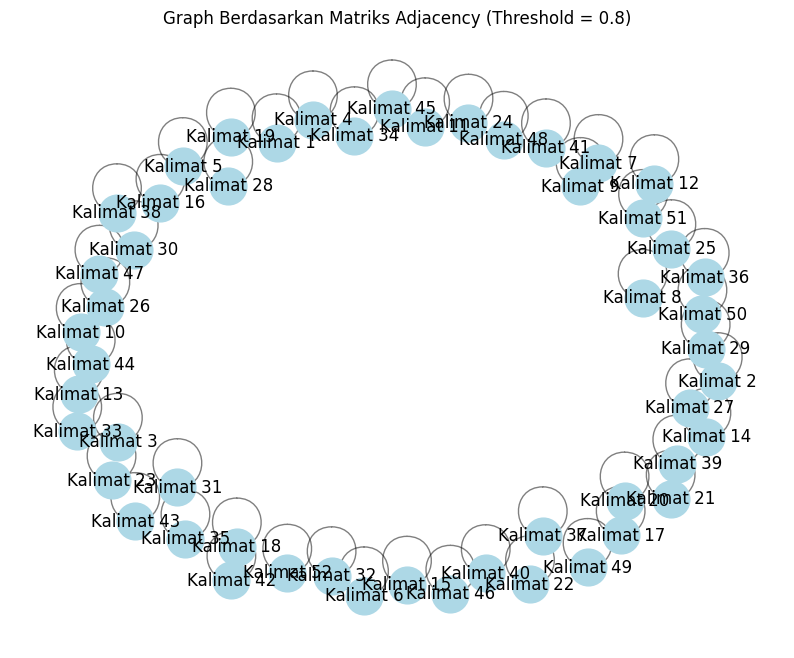

In [98]:
# Buat graph dari matriks adjacency
G = nx.from_pandas_adjacency(adjacency_matrix)

# Gambar graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)  # Posisi node
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=700)
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=12)

# Tampilkan graph
plt.title("Graph Berdasarkan Matriks Adjacency (Threshold = 0.8)")
plt.axis('off')  # Matikan sumbu
plt.show()

In [99]:
# Hitung betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)
# Hitung degree centrality
degree_centrality = nx.degree_centrality(G)
# Hitung closeness centrality
closeness_centrality = nx.closeness_centrality(G)

# Tampilkan hasil centrality dalam urutan bobot tertinggi
print("Betweenness Centrality:")
sorted_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)
for kalimat, nilai in sorted_betweenness:
    print(f"Kalimat {kalimat}: {nilai:.4f}")

print("\nDegree Centrality:")
sorted_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)
for kalimat, nilai in sorted_degree:
    print(f"Kalimat {kalimat}: {nilai:.4f}")

print("\nCloseness Centrality:")
sorted_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)
for kalimat, nilai in sorted_closeness:
    print(f"Kalimat {kalimat}: {nilai:.4f}")

Betweenness Centrality:
Kalimat Kalimat 1: 0.0000
Kalimat Kalimat 2: 0.0000
Kalimat Kalimat 3: 0.0000
Kalimat Kalimat 4: 0.0000
Kalimat Kalimat 5: 0.0000
Kalimat Kalimat 6: 0.0000
Kalimat Kalimat 7: 0.0000
Kalimat Kalimat 8: 0.0000
Kalimat Kalimat 9: 0.0000
Kalimat Kalimat 10: 0.0000
Kalimat Kalimat 11: 0.0000
Kalimat Kalimat 12: 0.0000
Kalimat Kalimat 13: 0.0000
Kalimat Kalimat 14: 0.0000
Kalimat Kalimat 15: 0.0000
Kalimat Kalimat 16: 0.0000
Kalimat Kalimat 17: 0.0000
Kalimat Kalimat 18: 0.0000
Kalimat Kalimat 19: 0.0000
Kalimat Kalimat 20: 0.0000
Kalimat Kalimat 21: 0.0000
Kalimat Kalimat 22: 0.0000
Kalimat Kalimat 23: 0.0000
Kalimat Kalimat 24: 0.0000
Kalimat Kalimat 25: 0.0000
Kalimat Kalimat 26: 0.0000
Kalimat Kalimat 27: 0.0000
Kalimat Kalimat 28: 0.0000
Kalimat Kalimat 29: 0.0000
Kalimat Kalimat 30: 0.0000
Kalimat Kalimat 31: 0.0000
Kalimat Kalimat 32: 0.0000
Kalimat Kalimat 33: 0.0000
Kalimat Kalimat 34: 0.0000
Kalimat Kalimat 35: 0.0000
Kalimat Kalimat 36: 0.0000
Kalimat Kalim

In [101]:
# Mencetak kalimat dengan bobot tertinggi dari setiap centrality
print("Kalimat dengan Bobot Tertinggi:")
print(f"Betweenness Centrality Tertinggi: Kalimat {sorted_betweenness[0][0]} dengan nilai {sorted_betweenness[0][1]:.4f}")
print(f"Degree Centrality Tertinggi: Kalimat {sorted_degree[0][0]} dengan nilai {sorted_degree[0][1]:.4f}")
print(f"Closeness Centrality Tertinggi: Kalimat {sorted_closeness[0][0]} dengan nilai {sorted_closeness[0][1]:.4f}")

Kalimat dengan Bobot Tertinggi:
Betweenness Centrality Tertinggi: Kalimat Kalimat 1 dengan nilai 0.0000
Degree Centrality Tertinggi: Kalimat Kalimat 1 dengan nilai 0.0392
Closeness Centrality Tertinggi: Kalimat Kalimat 1 dengan nilai 0.0000
